In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt #visualization
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split #ML
from sklearn.preprocessing import StandardScaler

Algorithms Used:
1. K Nearest Neighbor
2. Decision Tree
3. Random Forest

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
df = pd.read_csv('/content/heart_cleveland_upload.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
296,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


**Data Visualization**

In [ ]:
print(df.shape)

(297, 14)


# Exploratory Data Analysis

In [146]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [147]:
print(f"there are {df.duplicated().sum()} duplicated values in this dataset.")

there are 0 duplicated values in this dataset.


In [148]:
pd.DataFrame({
    'Proportion': df.condition.value_counts(),
    'Frequency': df.condition.value_counts(normalize=True),
    'Percentage': round(df.condition.value_counts(normalize=True) * 100, 2),
    'Condition': ['No disease', 'Disease']
}).set_index('Condition')

,Proportion,Frequency,Percentage
Condition,,,
No disease,160,0.538721,53.87
Disease,137,0.461279,46.13


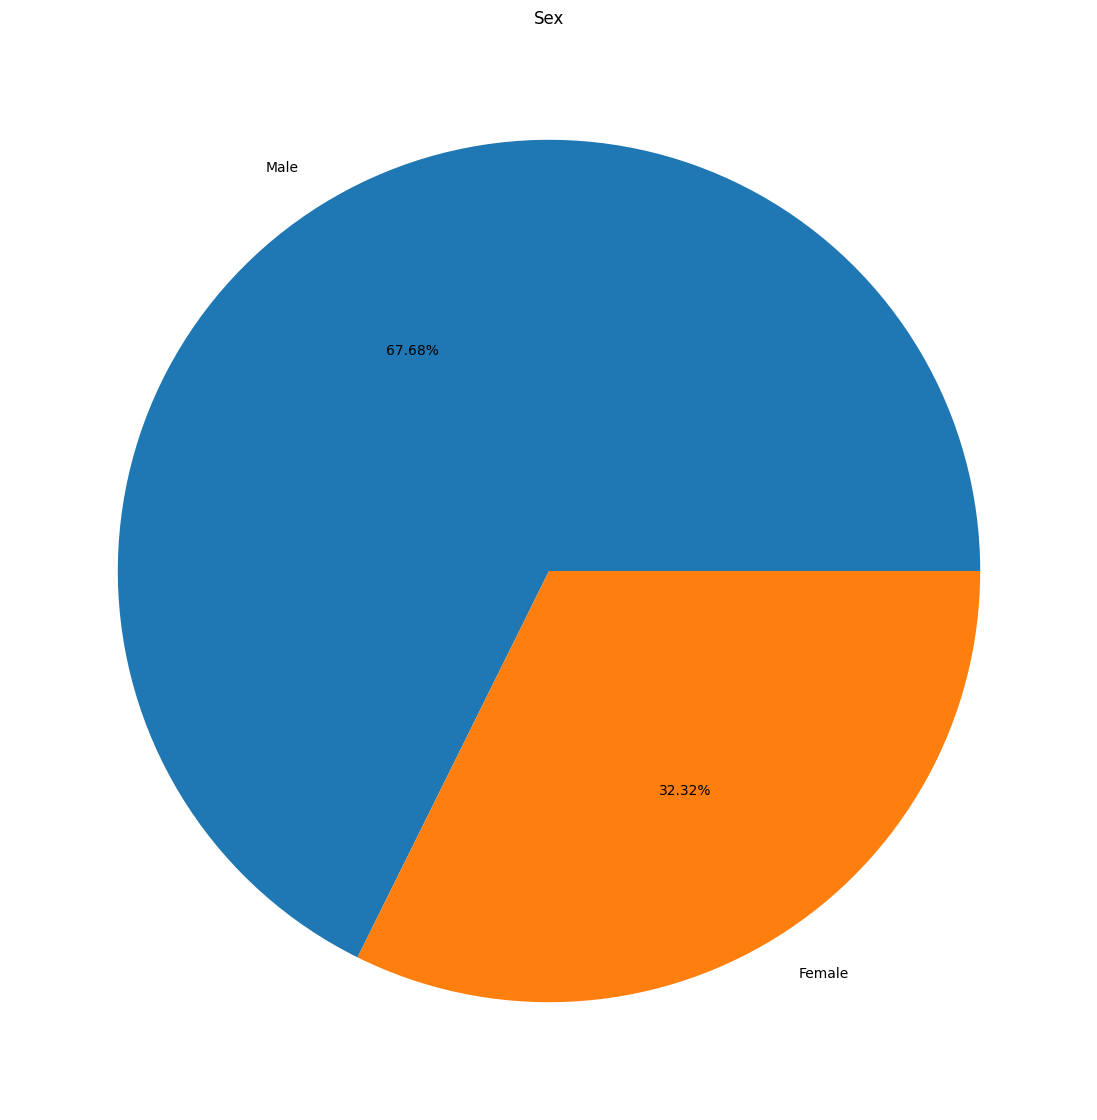

In [149]:
fig, ax = plt.subplots()
ax.pie(df.sex.value_counts(), labels=['Male', 'Female'], autopct='%.2f%%')

plt.title('Sex')
plt.show()


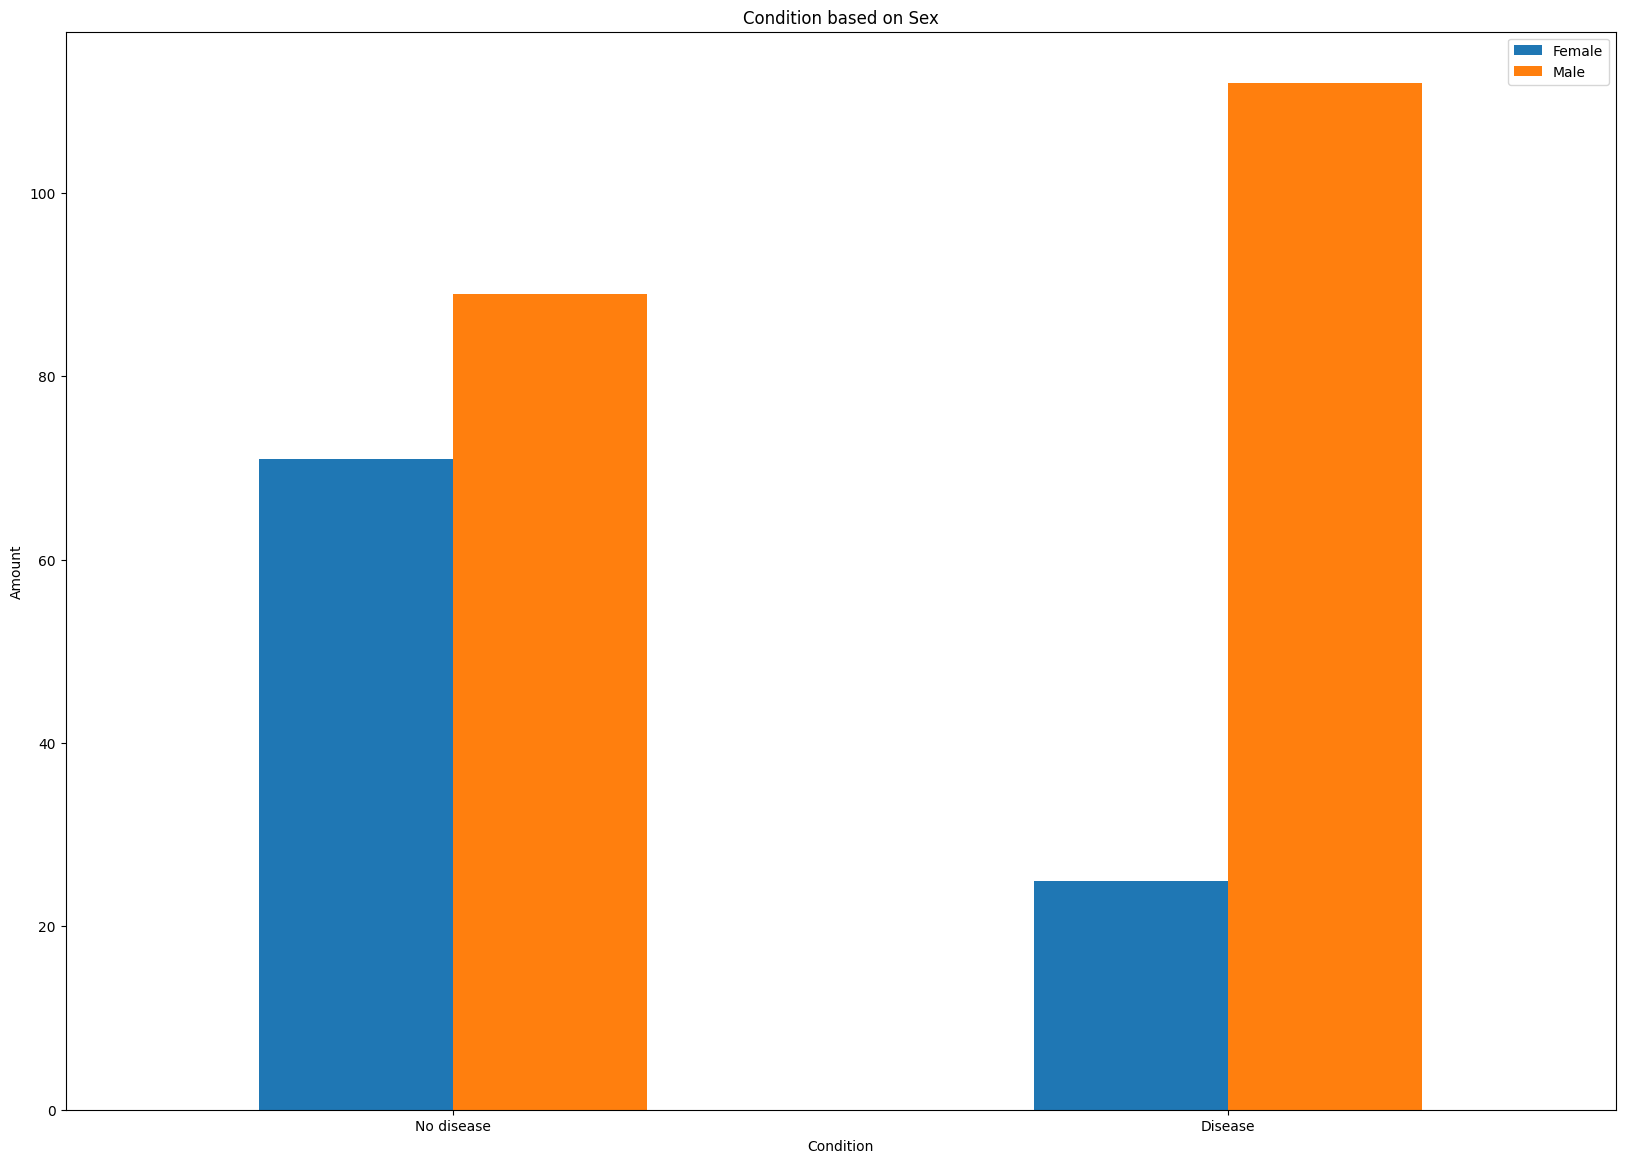

In [150]:
pd.crosstab(df.condition, df.sex).plot(kind='bar')

plt.title('Condition based on Sex')
plt.xlabel('Condition')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks([0, 1], ['No disease', 'Disease'], rotation=0)

plt.show()

In [151]:
pd.DataFrame({
    'Proportion': df.cp.value_counts(),
    'Frequency': df.cp.value_counts(normalize=True),
    'Percentage': round(df.cp.value_counts(normalize=True) * 100, 2),
    'Chest Pain Type': ['Asymptomatic', 'Non-anginal', 'Atypical Angina', 'Typical Angina']
}).set_index('Chest Pain Type')

,Proportion,Frequency,Percentage
Chest Pain Type,,,
Asymptomatic,142,0.478114,47.81
Non-anginal,83,0.279461,27.95
Atypical Angina,49,0.164983,16.50
Typical Angina,23,0.077441,7.74


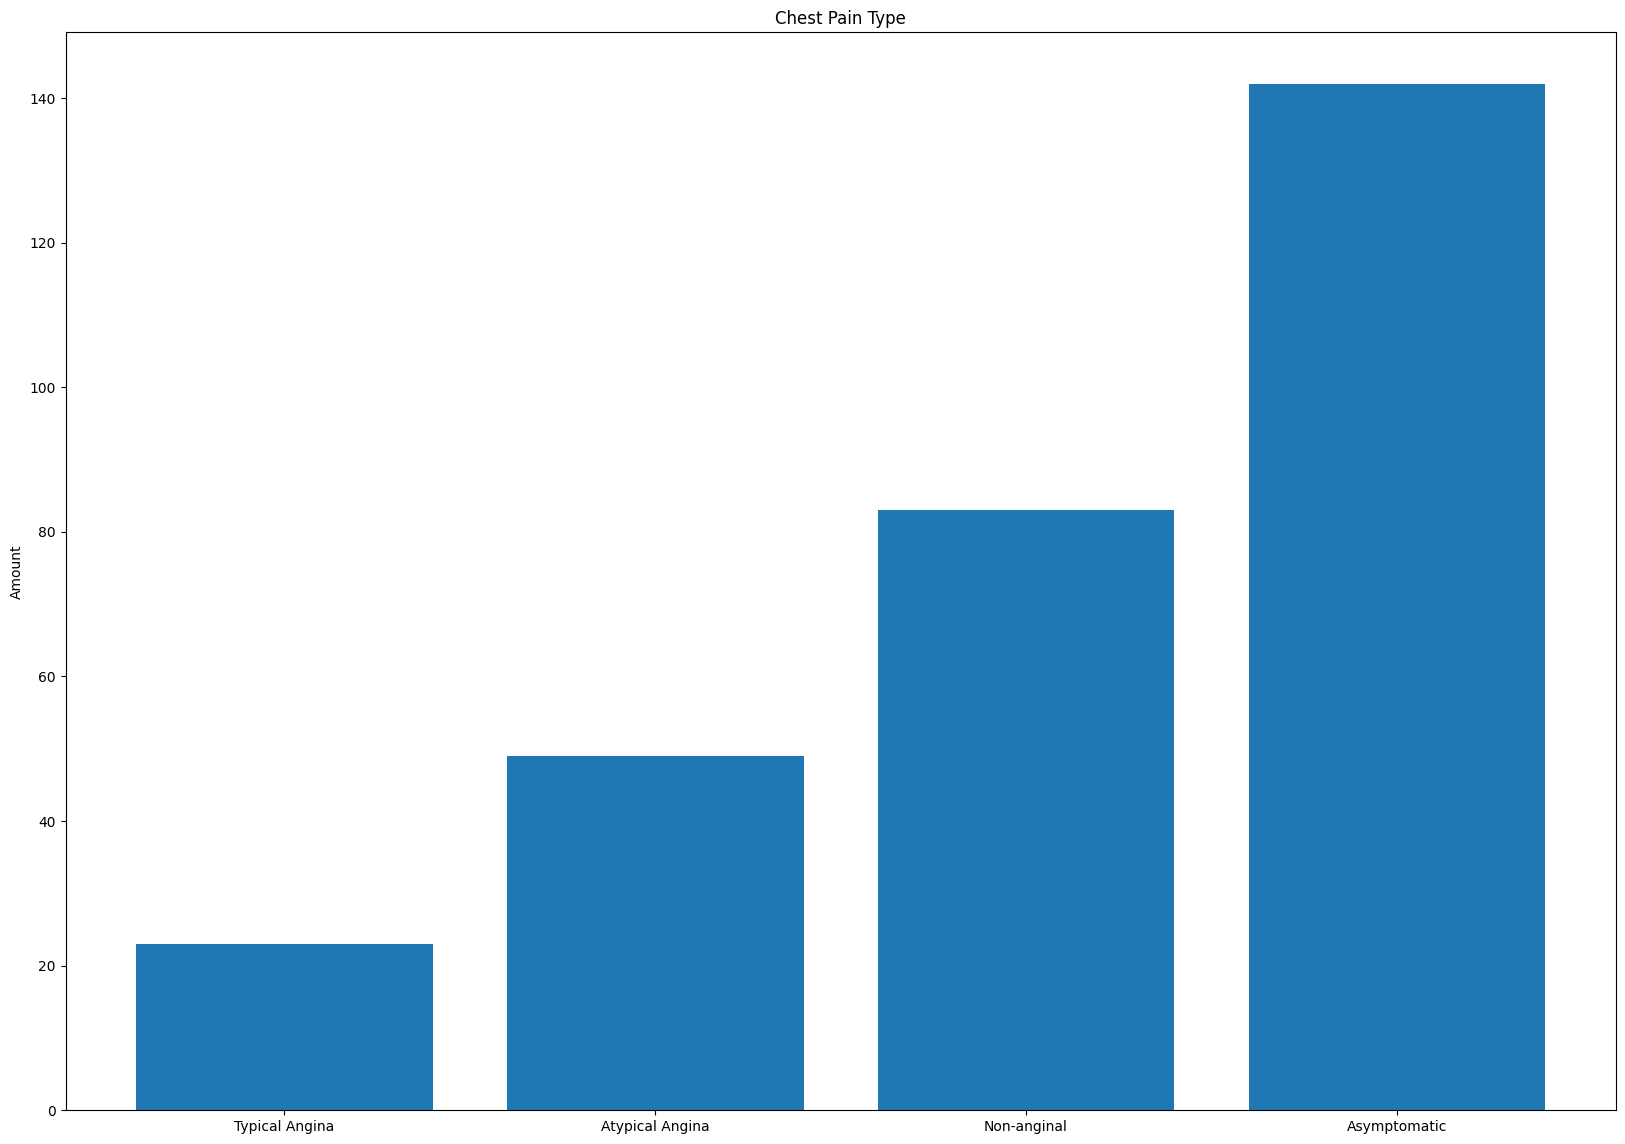

In [152]:
data = df.cp.value_counts()
fig, ax = plt.subplots()
ax.bar(data.index, data.values)

plt.xticks([0, 1, 2, 3], ['Typical Angina', 'Atypical Angina', 'Non-anginal', 'Asymptomatic'])
plt.title('Chest Pain Type')
plt.ylabel('Amount')
plt.show()

In [153]:
pd.crosstab(df.cp, df.condition)

condition,0,1
cp,,
0,16,7
1,40,9
2,65,18
3,39,103


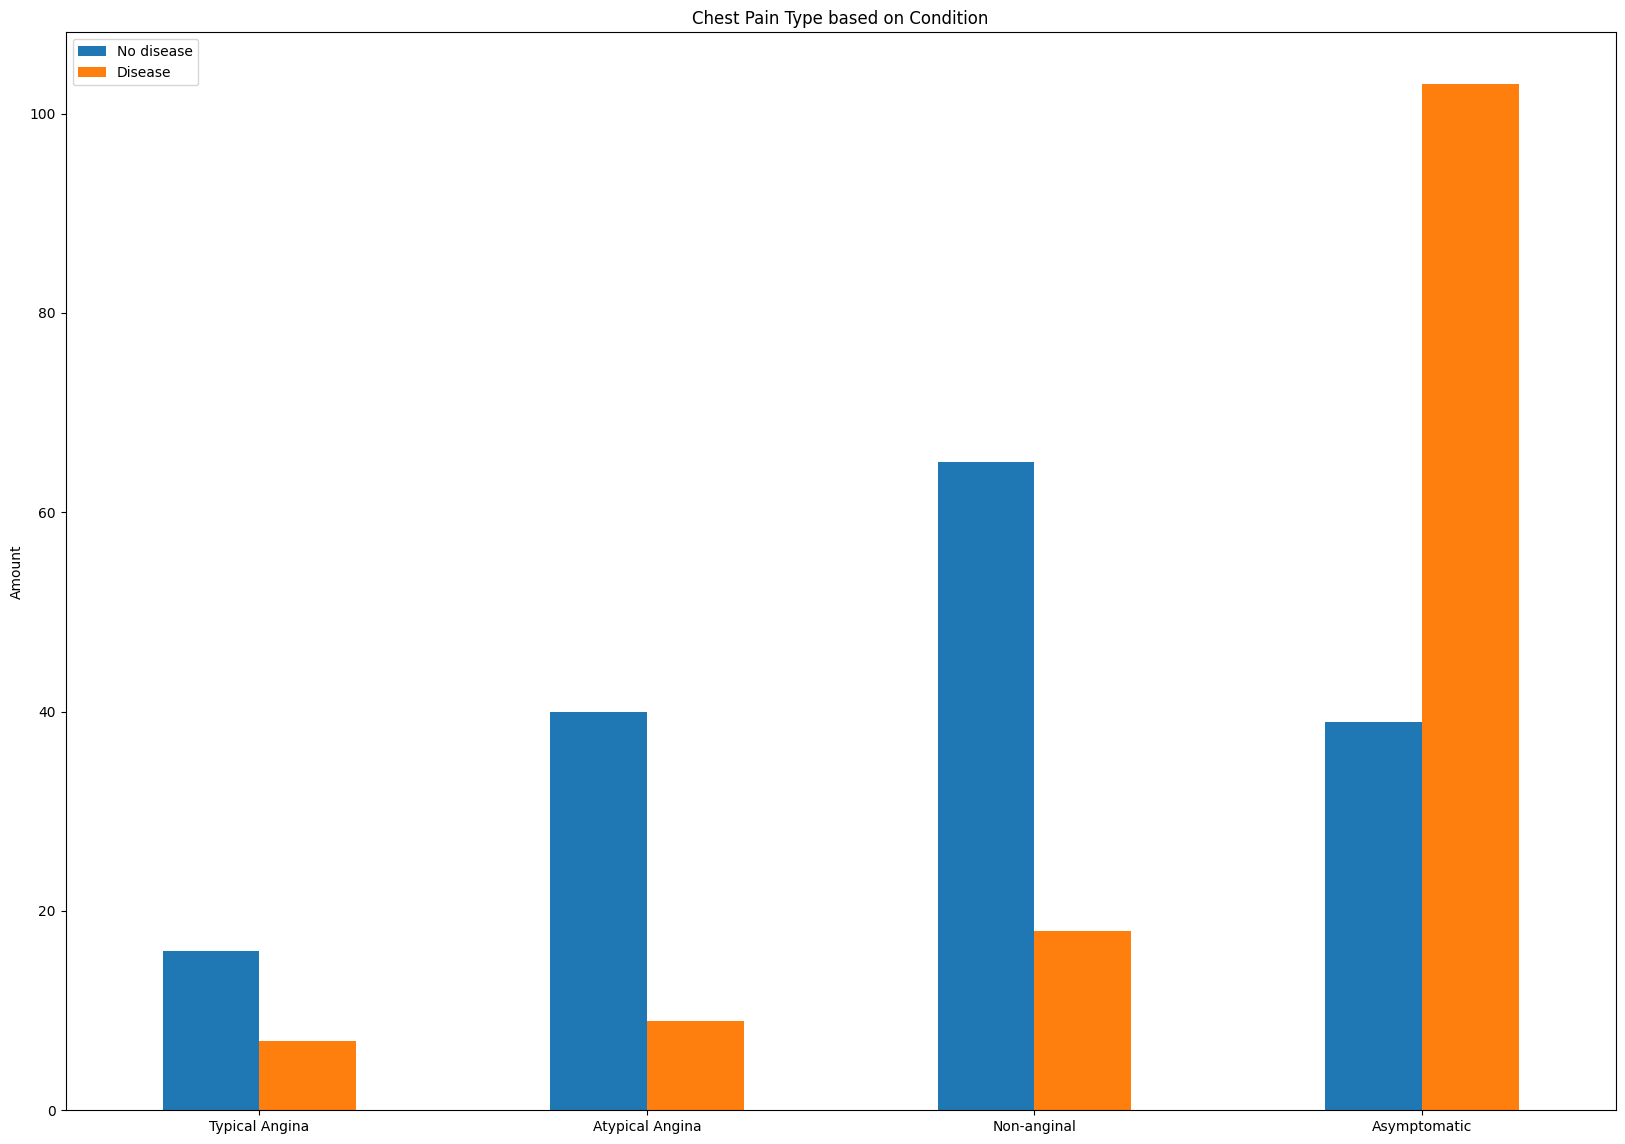

In [154]:
pd.crosstab(df.cp, df.condition).plot(kind='bar')

plt.title('Chest Pain Type based on Condition')
plt.xlabel(None)
plt.ylabel('Amount')
plt.legend(['No disease', 'Disease'])
plt.xticks([0, 1, 2, 3], ['Typical Angina', 'Atypical Angina', 'Non-anginal', 'Asymptomatic'], rotation=0)

plt.show()

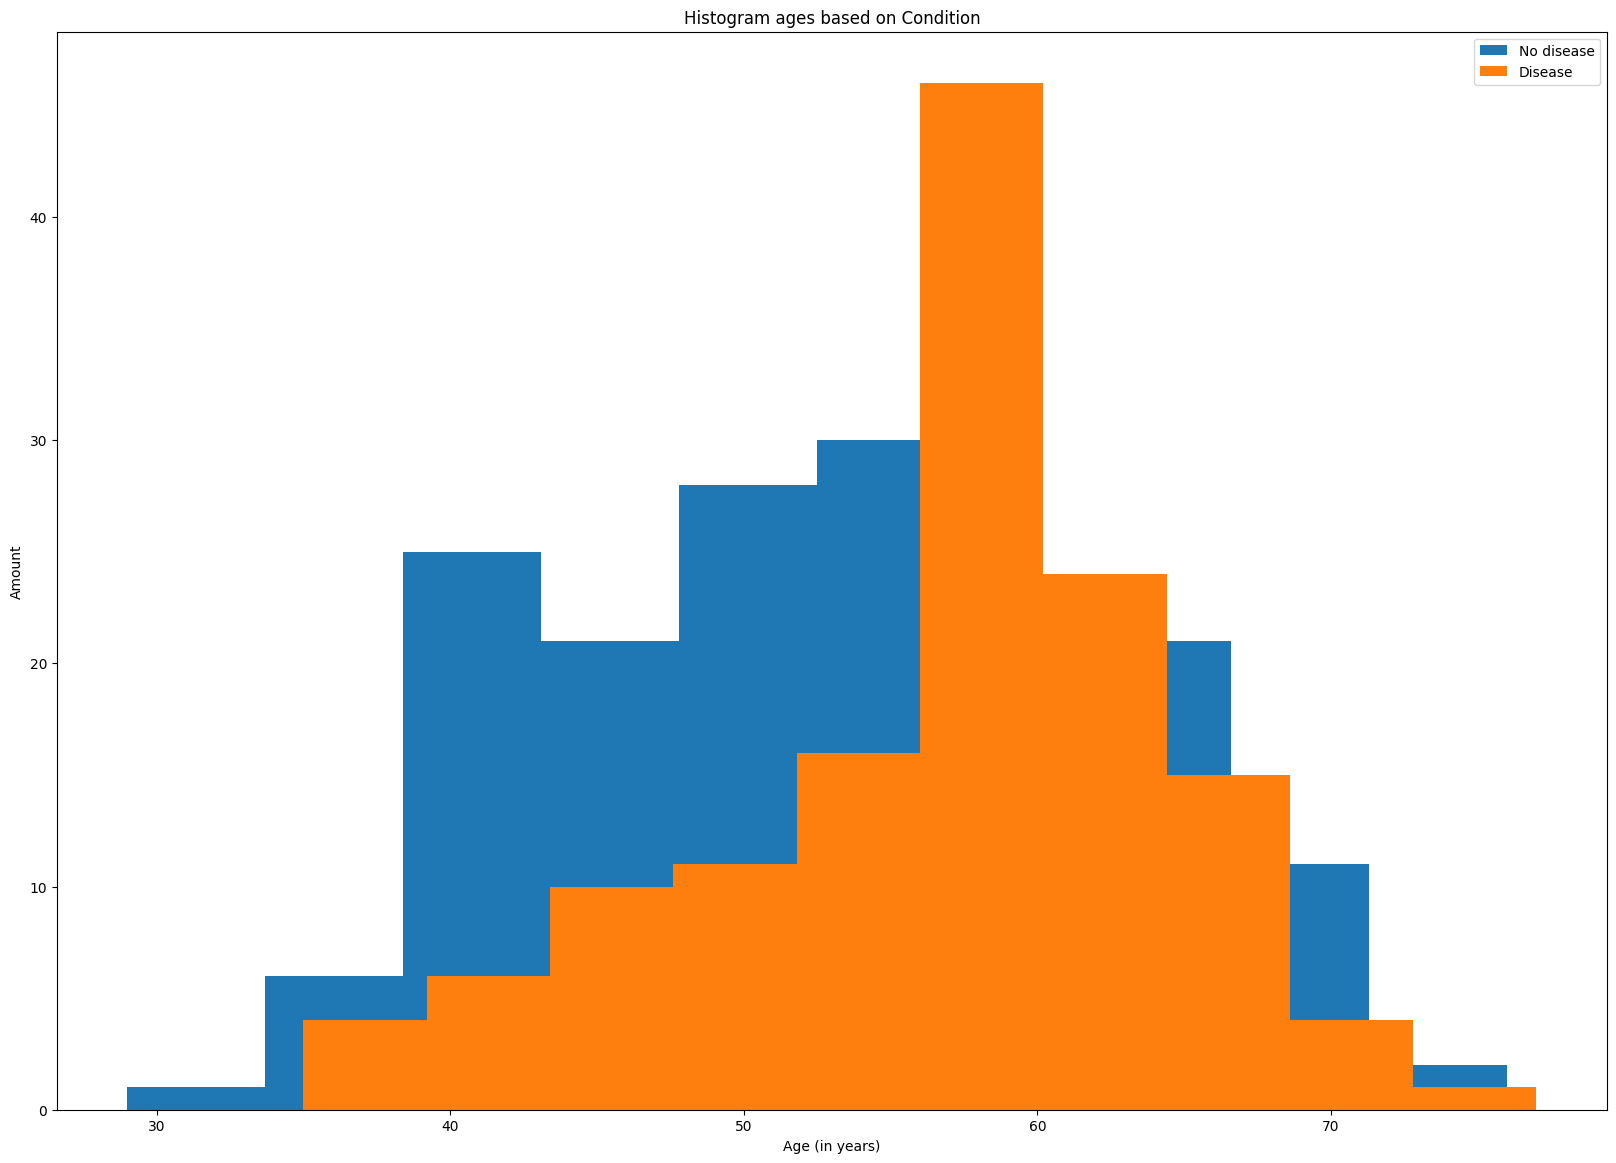

In [155]:
plt.hist(df.age[df.condition == 0])
plt.hist(df.age[df.condition == 1])

plt.title('Histogram ages based on Condition')
plt.xlabel('Age (in years)')
plt.ylabel('Amount')
plt.legend(['No disease', 'Disease'])

plt.show()

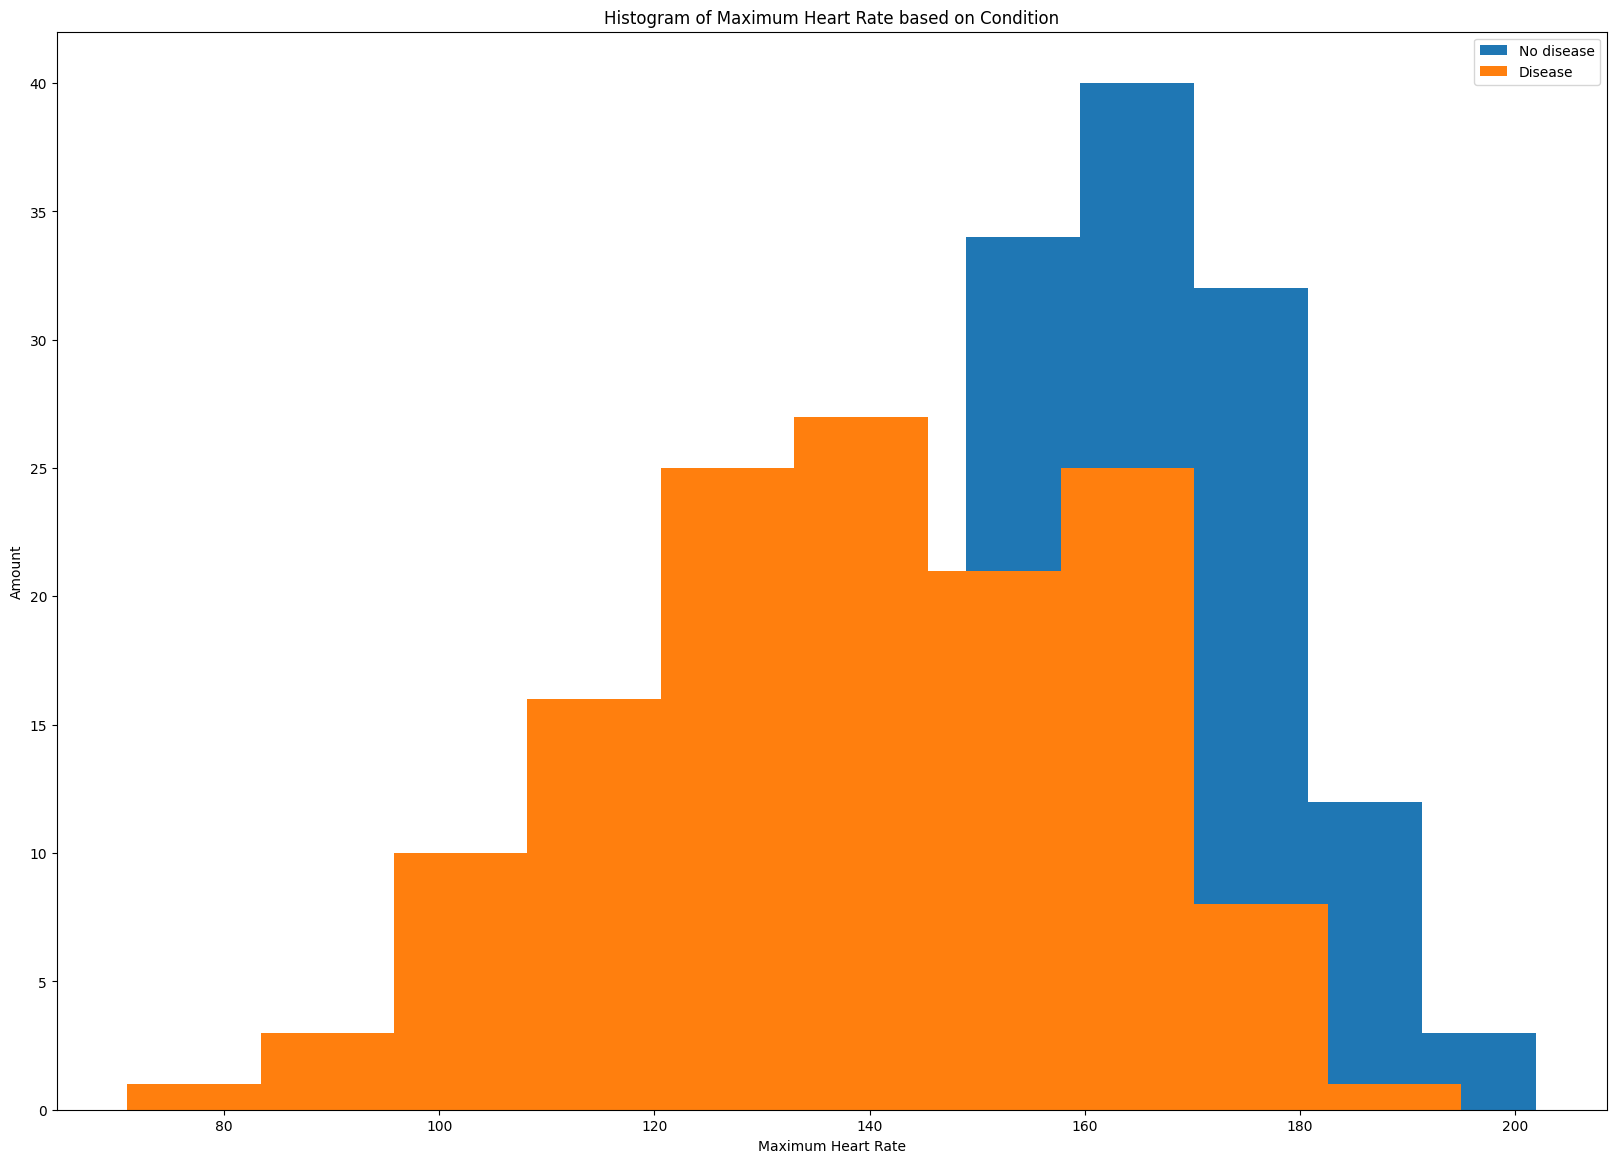

In [156]:
plt.hist(df.thalach[df.condition == 0])
plt.hist(df.thalach[df.condition == 1])

plt.title('Histogram of Maximum Heart Rate based on Condition')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Amount')
plt.legend(['No disease', 'Disease'])

plt.show()

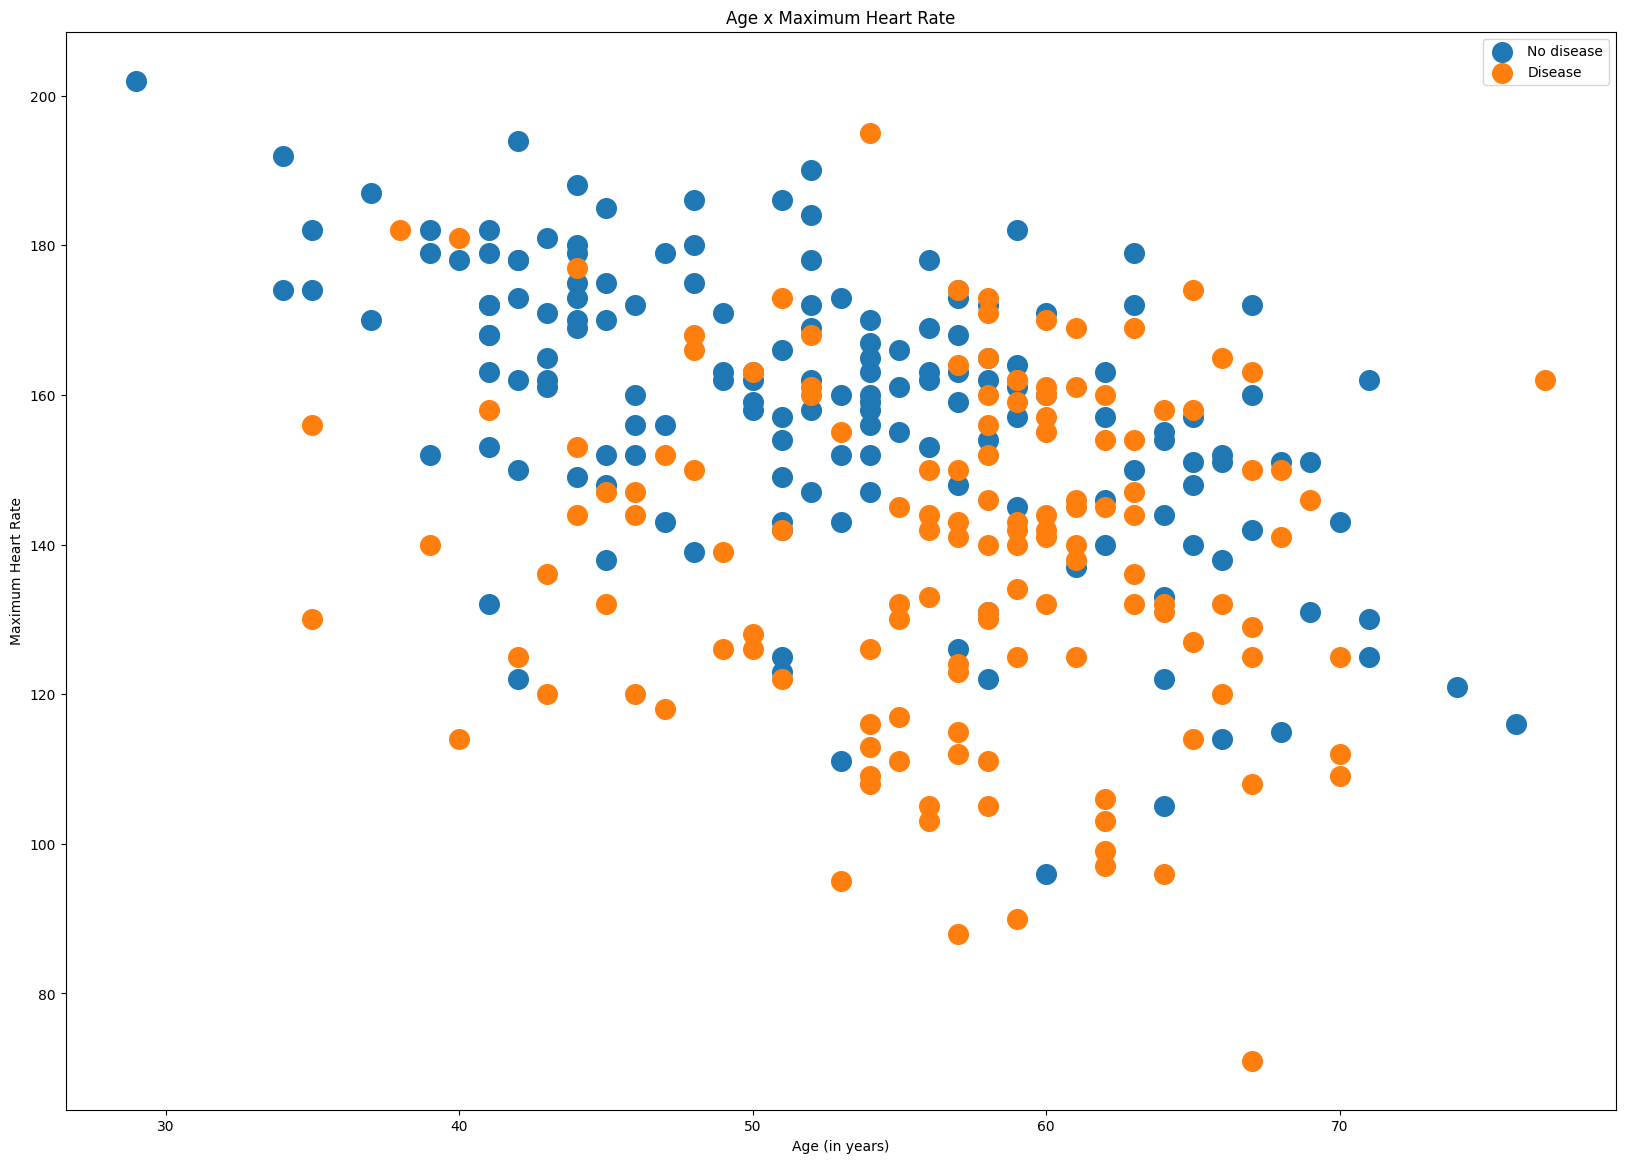

In [157]:
plt.scatter(df.age[df.condition == 0], df.thalach[df.condition == 0], s=200)
plt.scatter(df.age[df.condition == 1], df.thalach[df.condition == 1], s=200)

plt.title('Age x Maximum Heart Rate')
plt.xlabel('Age (in years)')
plt.ylabel('Maximum Heart Rate')
plt.legend(['No disease', 'Disease'])

plt.show()

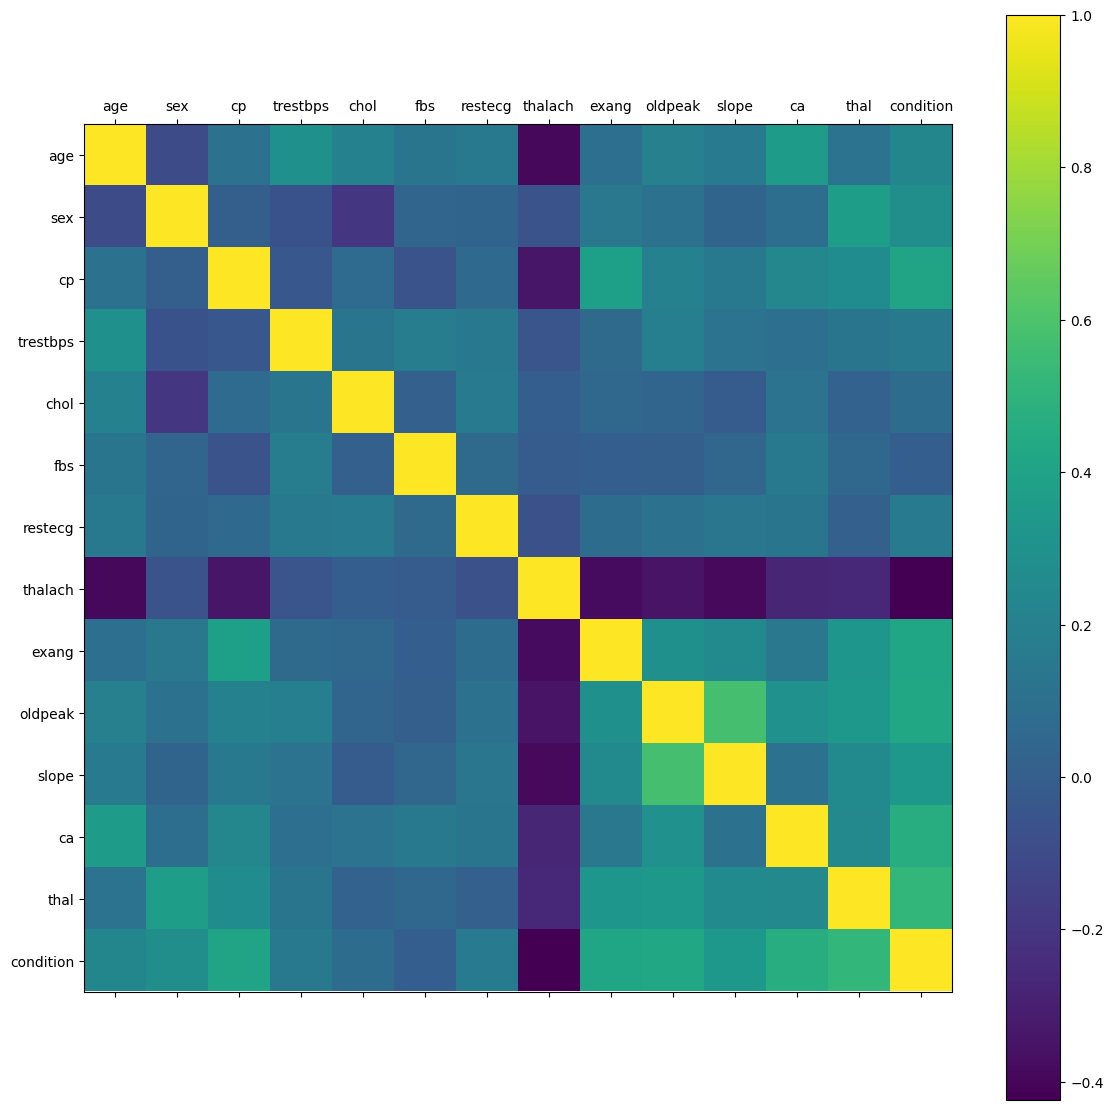

In [172]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar()

# Model Training and Evaluation

In [159]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [160]:
X = df.drop(['condition'], axis=1)
y = df.condition

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

## 1. K-Nearest Neighbor Classifier

In [162]:
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [163]:
y_pred_knn = knn_classifier.predict(X_test)

In [164]:
# evaluating model performance metrics
accuracy_knn = accuracy_score(y_test, y_pred_knn)
confusion_knn = confusion_matrix(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

In [165]:
print(f"Accuracy: {accuracy_knn}")
print(f"Confusion Matrix:\n{confusion_knn}")
print(f"Classification Report:\n{classification_rep_knn}")

Accuracy: 0.7666666666666667
Confusion Matrix:
[[28  4]
 [10 18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.88      0.80        32
           1       0.82      0.64      0.72        28

    accuracy                           0.77        60
   macro avg       0.78      0.76      0.76        60
weighted avg       0.77      0.77      0.76        60



## 2. Decision Tree

In [166]:
decision_tree_classifier = DecisionTreeClassifier()
decision_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [167]:
y_pred_tree = decision_tree_classifier.predict(X_test)

In [168]:
# evaluating model performance metrics
accuracy_tree = accuracy_score(y_test, y_pred_tree)
confusion_tree = confusion_matrix(y_test, y_pred_tree)
classification_rep_tree = classification_report(y_test, y_pred_tree)

print(f"Accuracy: {accuracy_tree}")
print(f"Confusion Matrix:\n{confusion_tree}")
print(f"Classification Report:\n{classification_rep_tree}")

Accuracy: 0.7166666666666667
Confusion Matrix:
[[22 10]
 [ 7 21]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.69      0.72        32
           1       0.68      0.75      0.71        28

    accuracy                           0.72        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.72      0.72      0.72        60



## 3. Random Forest

In [169]:
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [170]:
y_pred_rf = random_forest_classifier.predict(X_test)

In [171]:
# evaluating model performance metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
confusion_rf = confusion_matrix(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf}")
print(f"Confusion Matrix:\n{confusion_rf}")
print(f"Classification Report:\n{classification_rep_rf}")

Accuracy: 0.8333333333333334
Confusion Matrix:
[[30  2]
 [ 8 20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.94      0.86        32
           1       0.91      0.71      0.80        28

    accuracy                           0.83        60
   macro avg       0.85      0.83      0.83        60
weighted avg       0.85      0.83      0.83        60

